### Problem statement
Market Basket Analysis: Apriori Algorithm

Dataset: Order1.csv

The dataset has 38765 rows of the purchase orders of people from the
grocery stores. These orders can be analysed, and association rules can
be generated using Market Basket Analysis by algorithms like Apriori
Algorithm.

Follow following Steps:
1. Data Pre-processing
2. Generate the list of transactions fromthe dataset
3. Train Apriori on the dataset
4. Visualize the list of datasets

In [1]:
! pip install apyori 

In [2]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

In [3]:
store_data = pd.read_csv("../all_datasets/Apriori/Order1.csv")
num_records = len(store_data)
store_data.head()   

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
store_data.shape

(38765, 3)

### Data preprocessing

In [5]:
store_data.shape

(38765, 3)

In [6]:
store_data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
transaction = store_data.groupby(['Member_number', 'Date'])
transaction.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [8]:
support = (store_data['itemDescription'].value_counts()/14963*100)

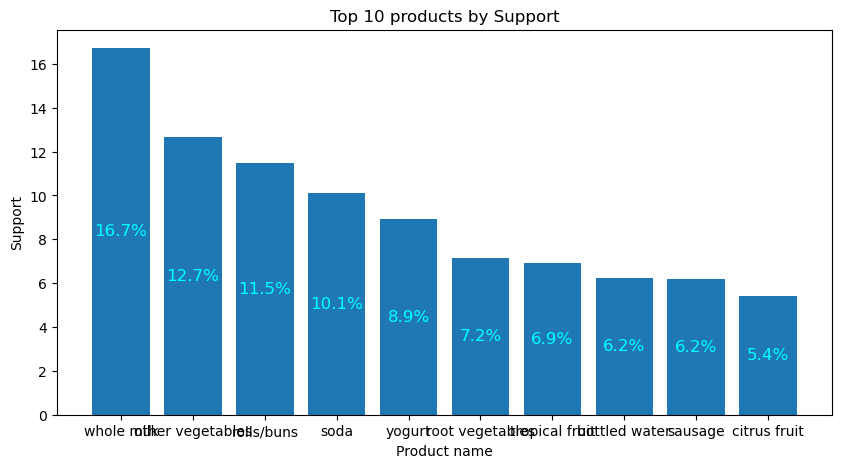

In [9]:
plt.figure(figsize=(10,5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color="cyan", fmt = '%2.1f%%', label_type="center")
plt.xticks(ticks= np.arange(len(support.head(10))), labels = support.index[:10])
plt.title("Top 10 products by Support")
plt.xlabel("Product name")
plt.ylabel("Support")
plt.show()

-----------------------------------

In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [17]:
transactions = store_data.groupby('Member_number')['itemDescription'].apply(list).tolist()
transactions

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [18]:
te = TransactionEncoder()
x = te.fit_transform(transactions)

In [19]:
x

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [21]:
df = pd.DataFrame(x, columns=te.columns_)

In [25]:
# using apriori
freq_itemset = apriori(df, min_support=0.04, use_colnames=True)
freq_itemset

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
243,0.043099,"(soda, root vegetables, whole milk)"
244,0.040021,"(soda, whole milk, sausage)"
245,0.044895,"(yogurt, whole milk, sausage)"
246,0.054387,"(soda, yogurt, whole milk)"


In [28]:
# Generating rules
rules = association_rules(freq_itemset, metric='confidence', min_threshold=0.30)

In [29]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(whole milk),0.078502,0.458184,0.040534,0.516340,1.126928,0.004565,1.120242,0.122227
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
2,(beef),(rolls/buns),0.119548,0.349666,0.040534,0.339056,0.969655,-0.001268,0.983946,-0.034324
3,(beef),(soda),0.119548,0.313494,0.042842,0.358369,1.143145,0.005365,1.069939,0.142223
4,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
...,...,...,...,...,...,...,...,...,...,...
206,"(soda, yogurt)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537,0.198033
207,"(soda, whole milk)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,0.011630,1.120247,0.251899
208,"(yogurt, whole milk)",(soda),0.150590,0.313494,0.054387,0.361158,1.152042,0.007178,1.074611,0.155374
209,"(yogurt, tropical fruit)",(whole milk),0.075680,0.458184,0.042329,0.559322,1.220738,0.007654,1.229506,0.195628


In [30]:
rules = rules[['antecedents', 'consequents', 'support', 'confidence']]
rules

,antecedents,consequents,support,confidence
0,(UHT-milk),(whole milk),0.040534,0.516340
1,(beef),(other vegetables),0.050795,0.424893
2,(beef),(rolls/buns),0.040534,0.339056
3,(beef),(soda),0.042842,0.358369
4,(beef),(whole milk),0.064135,0.536481
...,...,...,...,...
206,"(soda, yogurt)",(whole milk),0.054387,0.557895
207,"(soda, whole milk)",(yogurt),0.054387,0.359932
208,"(yogurt, whole milk)",(soda),0.054387,0.361158
209,"(yogurt, tropical fruit)",(whole milk),0.042329,0.559322


In [33]:
rules[rules['antecedents'] == {'beef'}]['consequents']

1    (other vegetables)
2          (rolls/buns)
3                (soda)
4          (whole milk)
Name: consequents, dtype: object